In [14]:
import os
import sys
import csv
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix as cmat
import collections
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as report  
from sklearn.model_selection import *
from sklearn.feature_selection import *
import matplotlib.pyplot as plt
import time
import random
import numpy
from datetime import datetime
import pandas as pd
import requests
import re
import xarray as xr
import pickle
#import statsmodels.graphics.tsaplots


Month
1960-01     6550.0
1960-02     8728.0
1960-03    12026.0
1960-04    14395.0
1960-05    14587.0
Name: Monthly car sales in Quebec 1960-1968, dtype: float64


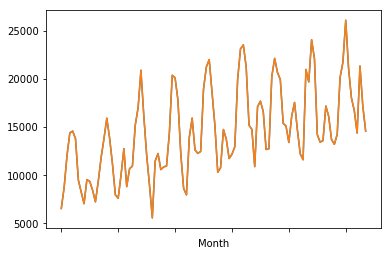

In [6]:

from pandas import Series
# load dataset
series = Series.from_csv('car-sales.csv', header=0)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
plt.show()

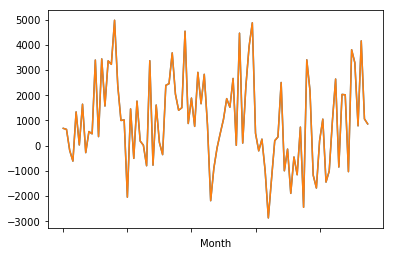

In [8]:
# seasonal difference
differenced = series.diff(12)
# trim off the first year of empty data
differenced = differenced[12:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv')
# plot differenced dataset
differenced.plot()
plt.show()

In [16]:
from pandas import Series
from pandas import DataFrame
# load dataset
series = Series.from_csv('seasonally_adjusted.csv', header=None)
# reframe as supervised learning
dataframe = DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = series.shift(i)
    dataframe['t'] = series.values
print(dataframe.head(13))
dataframe = dataframe[13:]
# save to new file
dataframe.to_csv('lags_12months_features.csv', index=False)

          t-12       t   t-11   t-10    t-9     t-8     t-7     t-6     t-5  \
1961-01    NaN   687.0    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
1961-02    NaN   646.0    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
1961-03    NaN  -189.0    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
1961-04    NaN  -611.0    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
1961-05    NaN  1339.0    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
1961-06    NaN    30.0    NaN    NaN    NaN     NaN     NaN     NaN   687.0   
1961-07    NaN  1645.0    NaN    NaN    NaN     NaN     NaN   687.0   646.0   
1961-08    NaN  -276.0    NaN    NaN    NaN     NaN   687.0   646.0  -189.0   
1961-09    NaN   561.0    NaN    NaN    NaN   687.0   646.0  -189.0  -611.0   
1961-10    NaN   470.0    NaN    NaN  687.0   646.0  -189.0  -611.0  1339.0   
1961-11    NaN  3395.0    NaN  687.0  646.0  -189.0  -611.0  1339.0    30.0   
1961-12    NaN   360.0  687.0  646.0 -189.0  -611.0 

In [ ]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
# load data
dataframe = read_csv('lags_12months_features.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [28]:
X = np.nan_to_num(X)
X

array([[  646.,  1573.,  -189., ...,   470.,  3395.,   360.],
       [ -189.,  3363.,  -611., ...,  3395.,   360.,  3440.],
       [ -611.,  3226.,  1339., ...,   360.,  3440.,  1573.],
       ..., 
       [-1443.,  1061., -1007., ...,  3804.,  3288.,   787.],
       [-1007.,   864.,   985., ...,  3288.,   787.,  4155.],
       [  985.,     0.,  2643., ...,   787.,  4155.,  1061.]])

[ 0.05467203  0.11600074  0.09064223  0.05800436  0.07986863  0.0854447
  0.0889696   0.05887343  0.10627578  0.05760168  0.13808339  0.06556343]


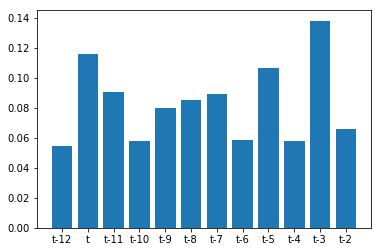

In [29]:
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scoresces_)
# plot importance scor
print(model.feature_importances_)
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()